In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
url_two = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
query_url_two = (f"{url_two}&q={city}")
print(query_url_two)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018202ce994fe151514b7236daca8402&q=luderitz


In [5]:
# Get weather data
cities_list1 = []
cloudy_list1 = []
country_list1 = []
date_list1 = []
humidity_list1 = []
lat_list1 = []
long_list1 = []
maxtemp_list1 = []
windspeed_list1 = []
recordone = 1

print(f"Beginning Data Retrieval")
print(f"--------------------------------")

for city in cities: 
    try:
        weather_responseone = requests.get(f"{url_two}&q={city}").json()
        cities_list1.append(weather_responseone["name"])
        cloudy_list1.append(weather_responseone["clouds"]["all"])
        country_list1.append(weather_responseone["sys"]["country"])
        date_list1.append(weather_responseone["dt"])
        humidity_list1.append(weather_responseone["main"]["humidity"])
        lat_list1.append(weather_responseone["coord"]["lat"])
        long_list1.append(weather_responseone["coord"]["lon"])
        maxtemp_list1.append(weather_responseone["main"]["temp_max"])
        windspeed_list1.append(weather_responseone["wind"]["speed"])
        cityname_info1 = (weather_responseone["name"])

        print(f"Processing Record {recordone} | {cityname_info1}")

        recordone +=1 
      
        time.sleep(2.00)
      
    except:
        print(f"City not found. Skipping...")
    continue

print(f"---------------------------")
print(f"Data Retrieval Complete")
print(f"----------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 | Hong Kong
Processing Record 2 | Punta Arenas
Processing Record 3 | Yellowknife
Processing Record 4 | Thompson
Processing Record 5 | Rome
Processing Record 6 | Mataura
Processing Record 7 | Bambous Virieux
Processing Record 8 | Qaanaaq
Processing Record 9 | Batagay-Alyta
Processing Record 10 | Ibra
Processing Record 11 | Varzea Grande
Processing Record 12 | Upernavik
City not found. Skipping...
Processing Record 13 | Liverpool
Processing Record 14 | Caramay
Processing Record 15 | Mazagao
Processing Record 16 | Kavieng
Processing Record 17 | Mayo
Processing Record 18 | Naze
Processing Record 19 | Port Alfred
Processing Record 20 | Riyadh
Processing Record 21 | Ullal
Processing Record 22 | Busselton
Processing Record 23 | Avarua
Processing Record 24 | Mount Gambier
City not found. Skipping...
City not found. Skipping...
Processing Record 25 | Rikitea
Processing Record 26 | Evensk
Processing Record 27 | Puerto 

Processing Record 233 | Marawi
City not found. Skipping...
Processing Record 234 | Luebo
Processing Record 235 | Elbistan
Processing Record 236 | San Cristobal
Processing Record 237 | Boende
Processing Record 238 | Isabela
City not found. Skipping...
Processing Record 239 | Vao
Processing Record 240 | Puerto Maldonado
City not found. Skipping...
Processing Record 241 | Broken Hill
Processing Record 242 | Lynn Haven
Processing Record 243 | Moerai
City not found. Skipping...
Processing Record 244 | Luan
Processing Record 245 | Haines Junction
Processing Record 246 | Lavrentiya
City not found. Skipping...
Processing Record 247 | Yatou
Processing Record 248 | Phonhong
Processing Record 249 | Setermoen
Processing Record 250 | Birao
Processing Record 251 | Massakory
City not found. Skipping...
Processing Record 252 | Vila Franca do Campo
City not found. Skipping...
Processing Record 253 | Zhigansk
City not found. Skipping...
Processing Record 254 | Kalmunai
Processing Record 255 | Monrovia
P

Processing Record 458 | Praia
Processing Record 459 | Khandyga
Processing Record 460 | Rio Grande
Processing Record 461 | Ilhabela
City not found. Skipping...
Processing Record 462 | Valle del Guamuez
Processing Record 463 | Sagarejo
Processing Record 464 | Kaeo
Processing Record 465 | Morden
Processing Record 466 | Port Shepstone
Processing Record 467 | Asau
Processing Record 468 | Tambacounda
Processing Record 469 | Antalaha
Processing Record 470 | Bay Roberts
Processing Record 471 | Correntina
Processing Record 472 | Camana
Processing Record 473 | Alappuzha
Processing Record 474 | Novyy Buh
Processing Record 475 | Mauguio
Processing Record 476 | San Patricio
Processing Record 477 | Bambanglipuro
Processing Record 478 | Tura
Processing Record 479 | Sokolo
Processing Record 480 | Boa Vista
Processing Record 481 | Lukovetskiy
Processing Record 482 | Saint Peters
Processing Record 483 | Sobolevo
Processing Record 484 | Zhengjiatun
Processing Record 485 | Clyde River
Processing Record 48

In [6]:
weather_dic = {"City": cities_list1, "Cloudiness": cloudy_list1, "Country": country_list1, 
               "Date": date_list1,"Humidity":humidity_list1, "Lat": lat_list1, "Lng": long_list1, 
               "Max Temp": maxtemp_list1, "Wind Speed": windspeed_list1}
weather_df = pd.DataFrame(weather_dic)
weather_df.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

# City DataFrame

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hong Kong,40,HK,1578889926,60,22.29,114.16,73.99,8.05
1,Punta Arenas,40,CL,1578890000,81,-53.15,-70.92,53.60,4.70
2,Yellowknife,5,CA,1578890002,64,62.46,-114.35,-41.80,4.70
3,Thompson,90,CA,1578890004,84,55.74,-97.86,1.40,3.36
4,Rome,90,US,1578890006,92,43.21,-75.46,28.99,4.70


In [8]:
#Exporting City DataFrame in a CSV:
weather_df.to_csv("weather_df.csv")

# Latitude vs Temperature Plot

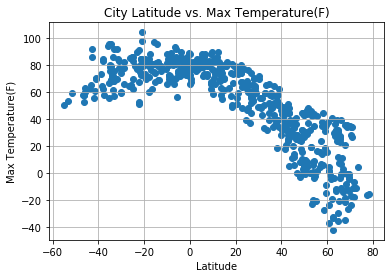

In [9]:
plt.title("City Latitude vs. Max Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel ("Max Temperature(F)")
plt.grid()

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o")
plt.savefig("Temperaturevs.Latitude.png")
plt.show()

Description: This chart shows the citys's latitudes providing a general decreading trend of temperature as the latitude increases.

# Latitude vs. Humidity Plot

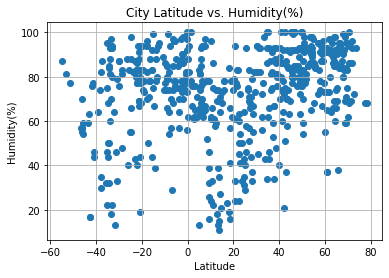

In [10]:
plt.title("City Latitude vs. Humidity(%)")
plt.xlabel("Latitude")
plt.ylabel ("Humidity(%)")
plt.grid()

plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o")
plt.savefig("Temperaturevs.Humidity.png")
plt.show()

Description: This plot shows the latitudes of the following the cities. It's really hard to tell a relationship. For cities with humidities less than 20%, they generally have a smaller latitude. 

# Latitude vs. Cloudiness

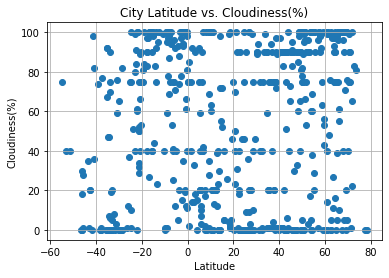

In [11]:
plt.title("City Latitude vs. Cloudiness(%)")
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness(%)")
plt.grid()

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o")
plt.savefig("Temperaturevs.Cloudiness.png")
plt.show()

Description:The following chart shows the Cloudiness(%) over the Latitude coordinates. The values are dispersed and hence it's really hard to detect a fundamental pattern just by looking.

# Latitude vs. Wind Speed(mph) Plot

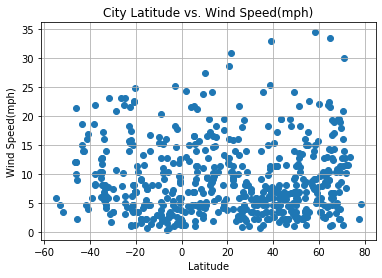

In [12]:
plt.title("City Latitude vs. Wind Speed(mph)")
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed(mph)")
plt.grid()

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o")
plt.savefig("Temperaturevs.WindSpeed.png")
plt.show()

Description: This plot shows that wind speed is generally less than 20 mph for majority of the cities in correlation to their latitude.

# Linear Regression 

####  Southern Hemisphere DataFrame

In [13]:
negativelat = weather_df.loc[(weather_df["Lat"] < 0)]
negativelat.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Punta Arenas,40,CL,1578890000,81,-53.15,-70.92,53.60,4.70
5,Mataura,18,NZ,1578890008,57,-46.19,168.86,57.99,11.99
6,Bambous Virieux,75,MU,1578890011,94,-20.34,57.76,81.00,6.93
10,Varzea Grande,40,BR,1578890019,83,-15.65,-56.13,80.60,5.55
14,Mazagao,40,BR,1578890027,100,-0.12,-51.29,77.00,2.24


In [14]:
citiesinSouthernH = negativelat.set_index(["City"])["Lat"]
citiesinSouthernH

City
Punta Arenas       -53.15
Mataura            -46.19
Bambous Virieux    -20.34
Varzea Grande      -15.65
Mazagao             -0.12
                    ...  
Salinopolis         -0.61
Tsaratanana        -16.78
Puerto Leguizamo    -0.19
Bairnsdale         -37.83
Oranjemund         -28.55
Name: Lat, Length: 185, dtype: float64

In [15]:
southern_hemisph = negativelat.set_index(["City"])["Lng"]
southern_hemisph.head()

City
Punta Arenas       -70.92
Mataura            168.86
Bambous Virieux     57.76
Varzea Grande      -56.13
Mazagao            -51.29
Name: Lng, dtype: float64

#### Breaking Down to Lat/Lng in Southern Hemisphere

In [16]:
citiesinSouthernH1 = pd.DataFrame({
    "Lat in Southern Hemisph": citiesinSouthernH, "Lng in Southern Hemisph":southern_hemisph})

citiesinSouthernH1.head()

,Lat in Southern Hemisph,Lng in Southern Hemisph
City,,
Punta Arenas,-53.15,-70.92
Mataura,-46.19,168.86
Bambous Virieux,-20.34,57.76
Varzea Grande,-15.65,-56.13
Mazagao,-0.12,-51.29


In [17]:
#Exporting Southern Hemisphere Data in a CSV:
negativelat.to_csv('negativelat.csv')

#Exporting Southern Hemisphere Data with only Latitude and Longitude in a CSV:
citiesinSouthernH1.to_csv('citiesinSouthernH1.csv')

#  Northern Hemisphere DataFrame

In [18]:
negativelatinN = weather_df.loc[(weather_df["Lat"] >= 0)]
negativelatinN.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hong Kong,40,HK,1578889926,60,22.29,114.16,73.99,8.05
2,Yellowknife,5,CA,1578890002,64,62.46,-114.35,-41.80,4.70
3,Thompson,90,CA,1578890004,84,55.74,-97.86,1.40,3.36
4,Rome,90,US,1578890006,92,43.21,-75.46,28.99,4.70
7,Qaanaaq,0,GL,1578890013,68,77.48,-69.36,-15.70,2.28


In [19]:
citiesinNorthernH = negativelatinN.set_index(["City"])["Lat"]
citiesinNorthernH.head()

City
Hong Kong      22.29
Yellowknife    62.46
Thompson       55.74
Rome           43.21
Qaanaaq        77.48
Name: Lat, dtype: float64

In [20]:
northern_hemisph = negativelatinN.set_index(["City"])["Lng"]
northern_hemisph.head()

City
Hong Kong      114.16
Yellowknife   -114.35
Thompson       -97.86
Rome           -75.46
Qaanaaq        -69.36
Name: Lng, dtype: float64

#### Breaking Down to Lat/Lng in Northern Hemisphere

In [21]:
citiesinNorthernH1 = pd.DataFrame({
    "Lat in Northern Hemisph": citiesinNorthernH, "Lng in Northern Hemisph":northern_hemisph})

citiesinNorthernH1.head()

,Lat in Northern Hemisph,Lng in Northern Hemisph
City,,
Hong Kong,22.29,114.16
Yellowknife,62.46,-114.35
Thompson,55.74,-97.86
Rome,43.21,-75.46
Qaanaaq,77.48,-69.36


In [22]:
#Exporting Northern Hemisphere Data in a CSV:
negativelatinN.to_csv('negativelatinN.csv')

#Exporting Northern Hemisphere Data with only Latitude and Longitude in a CSV:
citiesinNorthernH1.to_csv('citiesinNorthernH1.csv')


# Displaying Plots of Northern/Southern Hemispheres

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8595198424414584


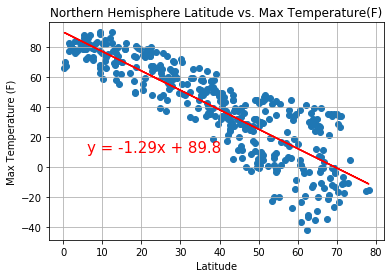

In [23]:
#Name x and y values
x_values = negativelatinN['Lat']
y_values = negativelatinN['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, marker = "o")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere Latitude vs. Max Temperature(F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot and Save
plt.savefig("NorthernHemisphereMaxTemperaturevs.Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38018347622141035


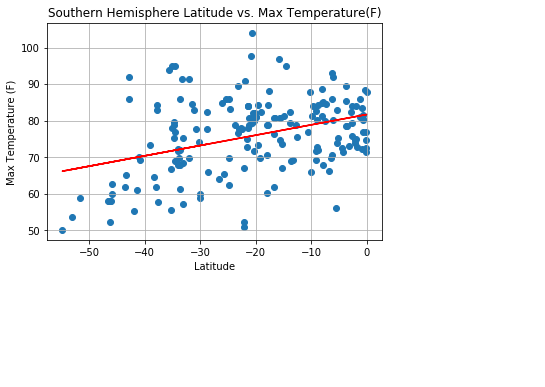

In [24]:
#Name x and y values
x_values1 = negativelat['Lat']
y_values1 = negativelat['Max Temp']
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values1,y_values1)

# Plot regression line
plt.plot(x_values1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere Latitude vs. Max Temperature(F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot and Save
plt.savefig("SouthernHemisphereMaxTemperaturevs.Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.41738360366121513


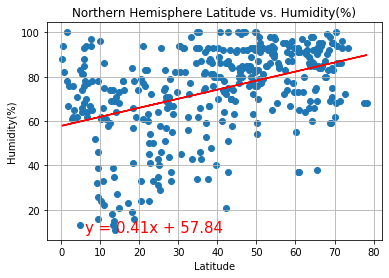

In [25]:
#Name x and y values
x_values2 = negativelatinN['Lat']
y_values2 = negativelatinN['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values2,y_values2)

# Plot regression line
plt.plot(x_values2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere Latitude vs. Humidity(%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot and Save
plt.savefig("NorthernHumidityvs.Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3497405331439497


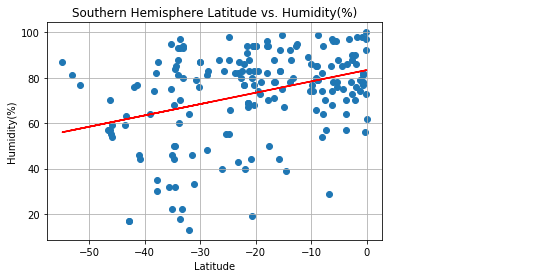

In [26]:
#Name x and y values
x_values3 = negativelat['Lat']
y_values3 = negativelat['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
regress_values = x_values3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values3,y_values3)

# Plot regression line
plt.plot(x_values3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere Latitude vs. Humidity(%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot and Save
plt.savefig("SouthernHumidityvs.Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2877268930936464


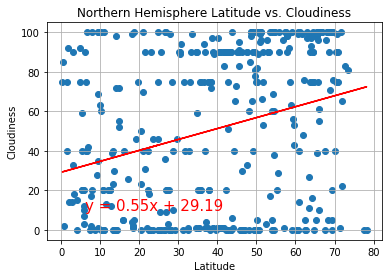

In [27]:
#Name x and y values
x_values4 = negativelatinN['Lat']
y_values4 = negativelatinN['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)
regress_values = x_values4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values4,y_values4)

# Plot regression line
plt.plot(x_values4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot and Save
plt.savefig("NorthernCloudinessvs.Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.44959231626001184


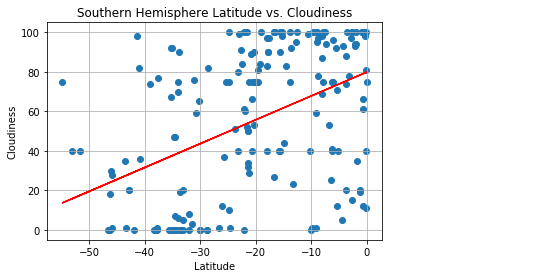

In [28]:
#Name x and y values
x_values5 = negativelat['Lat']
y_values5 = negativelat['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)
regress_values = x_values5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values5,y_values5)

# Plot regression line
plt.plot(x_values5,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot and Save
plt.savefig("SouthernCloudinessvs.Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006345891408990088


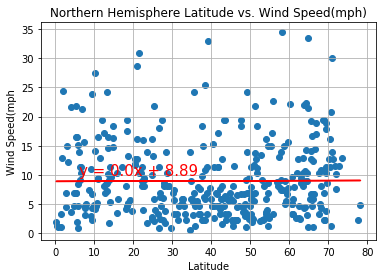

In [29]:
#Name x and y values
x_values6 = negativelatinN['Lat']
y_values6 = negativelatinN['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)
regress_values = x_values6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values6,y_values6)

# Plot regression line
plt.plot(x_values6,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere Latitude vs. Wind Speed(mph)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph')
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot and Save
plt.savefig("NorthernWindSpeedvs.Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.22021946026318245


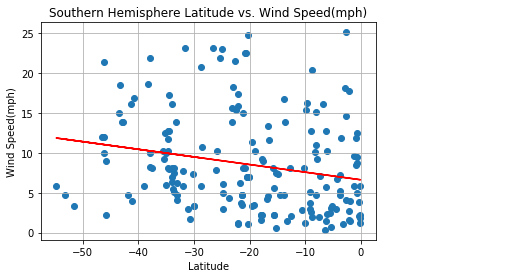

In [30]:
#Name x and y values
x_values7 = negativelat['Lat']
y_values7 = negativelat['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)
regress_values = x_values7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values7,y_values7)

# Plot regression line
plt.plot(x_values7,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere Latitude vs. Wind Speed(mph)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot and Save
plt.savefig("SouthernWindSpeedvs.Latitude.png")
plt.show()

3 Obersvable Trends based on the Data:
1) The maximum wind speed of the cities in the Northern Hemisphere is greater than the maximum wind speed in the Southern Hemisphere.
2) There is a higher percentage of cloudiness in the cities in Northern Hemisphere than in the Southern Hemisphere
3) The max temp has a negative correlation slope in  the cities in the Northern Hemisphere while the max temp has a positive correlation slope in the Southern Hemisphere.